In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df_Train=pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Predicting_Sales\train_data.csv")
df_product_price=pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Predicting_Sales\product_prices.csv")
date_to_week_id_map=pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Predicting_Sales\date_to_week_id_map.csv")
sample_submission=pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Predicting_Sales\sample_submission.csv")
test_data=(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Predicting_Sales\test_data.csv")

In [3]:
df_Train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [4]:
df_product_price.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [5]:
date_to_week_id_map.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [6]:
a = date_to_week_id_map.columns.to_list()
b = df_product_price.columns.to_list()
c = df_Train.columns.to_list()

print(" date_to_week_id_map:", a)
print("df_product_price", b)
print("df_Train", c)

 date_to_week_id_map: ['date', 'week_id']
df_product_price ['outlet', 'product_identifier', 'week_id', 'sell_price']
df_Train ['date', 'product_identifier', 'department_identifier', 'category_of_product', 'outlet', 'state', 'sales']


In [7]:
df_merge=pd.merge(date_to_week_id_map,  df_product_price,  on='week_id',how='inner')
dataset=pd.merge(df_merge,  df_Train,  on=["date",'outlet', 'product_identifier' ], how='inner')
dataset.head()


,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0


In [8]:
a1 = dataset['category_of_product'].unique()
print(a1)
a2 = dataset["state"].unique()
print(a2)

['others' 'fast_moving_consumer_goods' 'drinks_and_food']
['Maharashtra' 'Telangana' 'Kerala']


In [9]:
dataset.dtypes

date                      object
week_id                    int64
outlet                     int64
product_identifier         int64
sell_price               float64
department_identifier      int64
category_of_product       object
state                     object
sales                      int64
dtype: object

In [10]:
col=['category_of_product',"state"]
dataset[col]=dataset[col].astype('category')
dataset.dtypes

date                       object
week_id                     int64
outlet                      int64
product_identifier          int64
sell_price                float64
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
dtype: object

In [11]:
def scatter(dataset, columns):
    plt.figure()
    plt.scatter(dataset[columns],dataset['sales'])
    plt.xlabel(columns)
    plt.ylabel('sales')

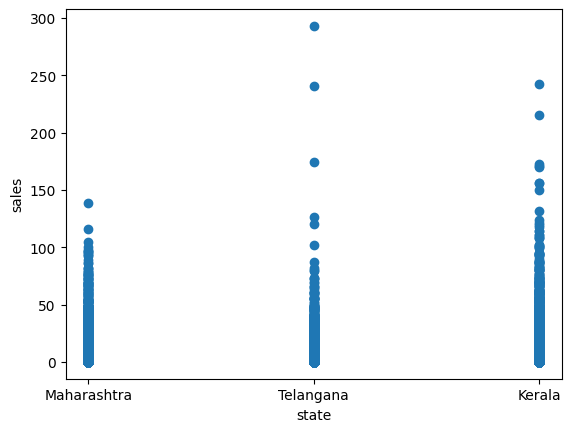

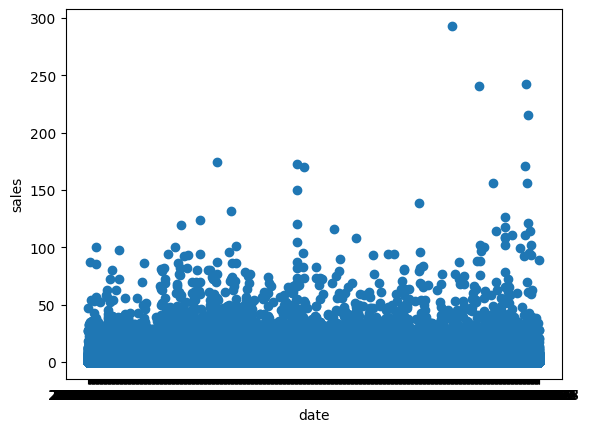

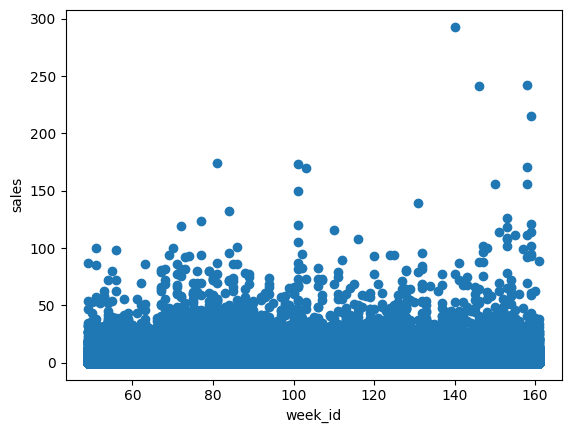

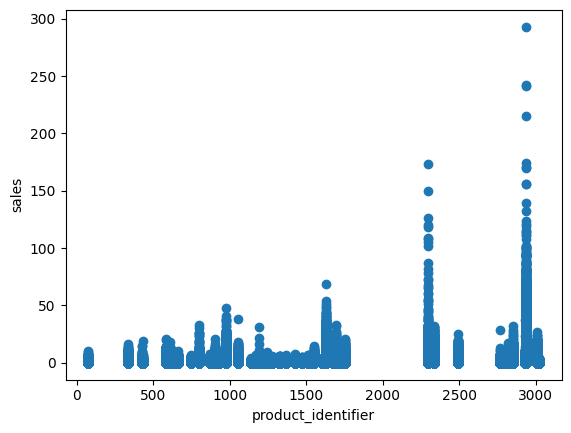

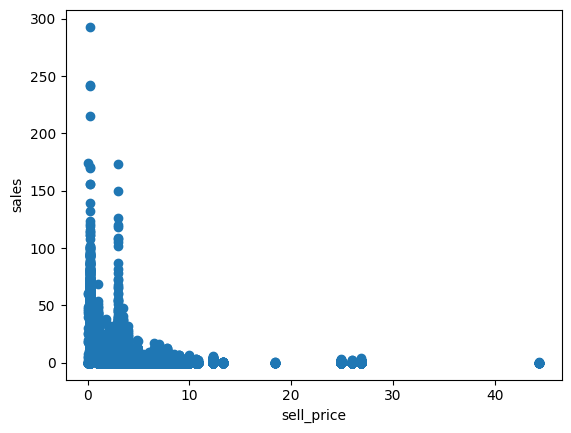

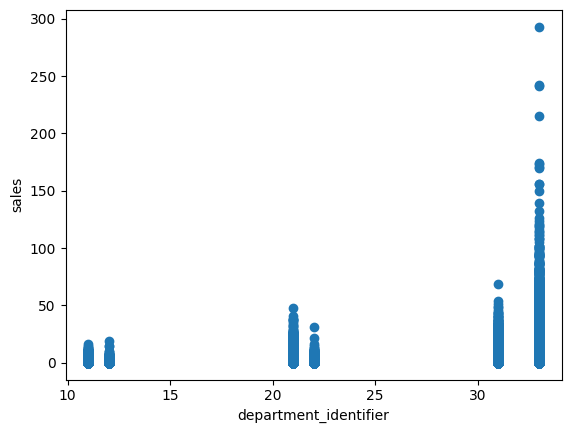

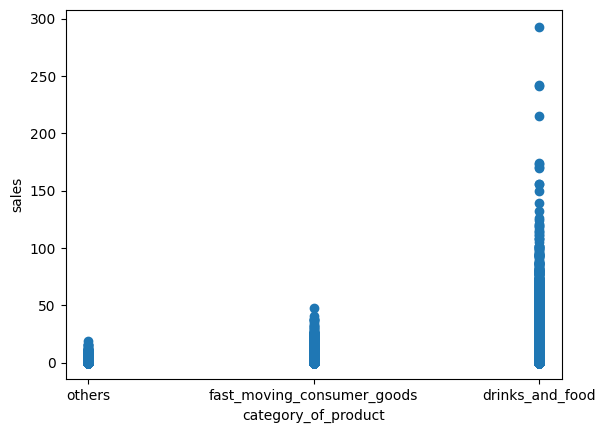

In [12]:
scatter(dataset, "state")
scatter(dataset, "date")
scatter(dataset, "week_id")
scatter(dataset, "product_identifier")
scatter(dataset, "sell_price")
scatter(dataset, "department_identifier")
scatter(dataset, "category_of_product")

#date	week_id	outlet	product_identifier	sell_price	department_identifier	category_of_product	state	sales

In [13]:
dataset['state_encoded']= LabelEncoder().fit_transform(dataset['state'])
dataset.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,state_encoded
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0,1
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0,1
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0,1
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0,1


In [14]:
dataset['category_of_product_encoded']= LabelEncoder().fit_transform(dataset['category_of_product'])
dataset.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,state_encoded,category_of_product_encoded
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0,1,2
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1,1,2
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0,1,2
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0,1,2
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0,1,1


In [15]:
a3 = dataset['state_encoded'].value_counts()
a4 = dataset['category_of_product_encoded'].value_counts()

In [16]:
print(a3)

print(a4)


state_encoded
1    158000
2    118500
0    118500
Name: count, dtype: int64
category_of_product_encoded
1    229100
0    134300
2     31600
Name: count, dtype: int64


In [17]:
dataset.isnull().sum()

date                           0
week_id                        0
outlet                         0
product_identifier             0
sell_price                     0
department_identifier          0
category_of_product            0
state                          0
sales                          0
state_encoded                  0
category_of_product_encoded    0
dtype: int64

In [18]:
dataset['month']=pd.to_datetime(dataset['date']).dt.month
dataset.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,state_encoded,category_of_product_encoded,month
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0,1,2,1
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1,1,2,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0,1,2,1
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0,1,2,1
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0,1,1,1


In [19]:
dataset.columns

Index(['date', 'week_id', 'outlet', 'product_identifier', 'sell_price',
       'department_identifier', 'category_of_product', 'state', 'sales',
       'state_encoded', 'category_of_product_encoded', 'month'],
      dtype='object')

In [20]:
dataset.drop(columns= ["date","week_id","state","category_of_product"],inplace=True)

In [21]:
dataset.columns

Index(['outlet', 'product_identifier', 'sell_price', 'department_identifier',
       'sales', 'state_encoded', 'category_of_product_encoded', 'month'],
      dtype='object')

In [22]:
import numpy as np
fig = plt.figure(figsize=(18, 14))
corr = dataset.corr()
print(corr)

                                   outlet  product_identifier  sell_price  \
outlet                       1.000000e+00        2.224525e-17   -0.000140   
product_identifier           2.224525e-17        1.000000e+00   -0.201074   
sell_price                  -1.403172e-04       -2.010739e-01    1.000000   
department_identifier        5.379033e-18        9.099899e-01   -0.302860   
sales                       -2.100456e-02        1.528933e-01   -0.198098   
state_encoded               -4.673351e-01       -9.635623e-18   -0.000481   
category_of_product_encoded -1.737605e-17       -8.666329e-01    0.318165   
month                        1.284597e-14        3.090176e-15    0.000568   

                             department_identifier     sales  state_encoded  \
outlet                                5.379033e-18 -0.021005  -4.673351e-01   
product_identifier                    9.099899e-01  0.152893  -9.635623e-18   
sell_price                           -3.028601e-01 -0.198098  -4.8124

<Figure size 1800x1400 with 0 Axes>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variable (y)
X = dataset.drop(columns=['sales'])  # Features
y = dataset['sales']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit ExtraTreesRegressor model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict sales on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Feature importances
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)


Mean Squared Error: 8.477524432607122
Feature Importances: [0.194065   0.11534391 0.42905704 0.07732381 0.02208701 0.05370213
 0.1084211 ]


In [24]:
test_data_process = pd.read_csv(r"C:\Users\adeel\Desktop\GitHub\Data_Sets\Predicting_Sales\train_data.csv")

In [25]:
test_data_process.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [26]:
dataset.head()

,outlet,product_identifier,sell_price,department_identifier,sales,state_encoded,category_of_product_encoded,month
0,111,74,2.94,11,0,1,2,1
1,111,337,7.44,11,1,1,2,1
2,111,423,0.97,12,0,1,2,1
3,111,432,4.97,12,0,1,2,1
4,111,581,4.88,21,0,1,1,1


In [27]:
df_merge_test = pd.merge(date_to_week_id_map,  df_product_price,  on='week_id',how='inner')
df_test = pd.merge(df_merge_test,  test_data_process,  on=["date",'outlet', 'product_identifier' ], how='inner')
df_test.head()


,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0


In [28]:
df_test.dtypes

date                      object
week_id                    int64
outlet                     int64
product_identifier         int64
sell_price               float64
department_identifier      int64
category_of_product       object
state                     object
sales                      int64
dtype: object

In [29]:
columns = ["category_of_product","state"]
df_test[columns]=df_test[columns].astype('category')
df_test.dtypes

date                       object
week_id                     int64
outlet                      int64
product_identifier          int64
sell_price                float64
department_identifier       int64
category_of_product      category
state                    category
sales                       int64
dtype: object

In [30]:
df_test['category_of_product_encoded']=LabelEncoder().fit_transform(df_test['category_of_product'])
df_test.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,category_of_product_encoded
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0,2
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1,2
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0,2
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0,2
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0,1


In [31]:
df_test['state_encoded']=LabelEncoder().fit_transform(df_test['state'])
df_test.head()

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,category_of_product_encoded,state_encoded
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0,2,1
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1,2,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0,2,1
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0,2,1
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0,1,1


In [32]:
df_test.head()
#'outlet', 'product_identifier', 'sell_price', 'department_identifier', 'sales', 'state_encoded', 'category_of_product_encoded', 'month'

,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,category_of_product_encoded,state_encoded
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0,2,1
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1,2,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0,2,1
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0,2,1
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0,1,1


In [33]:
df_test['month']=pd.to_datetime(df_test['date']).dt.month


In [34]:
df_test.head()




,date,week_id,outlet,product_identifier,sell_price,department_identifier,category_of_product,state,sales,category_of_product_encoded,state_encoded,month
0,2012-01-01,49,111,74,2.94,11,others,Maharashtra,0,2,1,1
1,2012-01-01,49,111,337,7.44,11,others,Maharashtra,1,2,1,1
2,2012-01-01,49,111,423,0.97,12,others,Maharashtra,0,2,1,1
3,2012-01-01,49,111,432,4.97,12,others,Maharashtra,0,2,1,1
4,2012-01-01,49,111,581,4.88,21,fast_moving_consumer_goods,Maharashtra,0,1,1,1


In [35]:
dataset.head()

,outlet,product_identifier,sell_price,department_identifier,sales,state_encoded,category_of_product_encoded,month
0,111,74,2.94,11,0,1,2,1
1,111,337,7.44,11,1,1,2,1
2,111,423,0.97,12,0,1,2,1
3,111,432,4.97,12,0,1,2,1
4,111,581,4.88,21,0,1,1,1


In [36]:
dataset.head()
df_test.drop(columns=['date','week_id','category_of_product', 'state'],inplace=True)


In [37]:
df_1=df_test.drop(columns= ['sales'])


In [38]:
df_2= df_test["sales"]

In [39]:
import numpy as np

# Assuming X is your input data as a DataFrame
X_array = df_1.values  # Convert DataFrame to NumPy array

# Now, you can use X_array for making predictions
y_pred = model.predict(X_array)

In [40]:

# Predict sales on the test data
y_pred_test = model.predict(df_1)

# Evaluate model performance using mean squared error
mse_test = mean_squared_error(y_pred_test, df_2)
print("Mean Squared Error on Test Data:", mse_test)


C:\Users\adeel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error on Test Data: 13.196724780366496
